In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DATA/cancer_classification.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Text(0.5, 0, 'Cancer Classification')

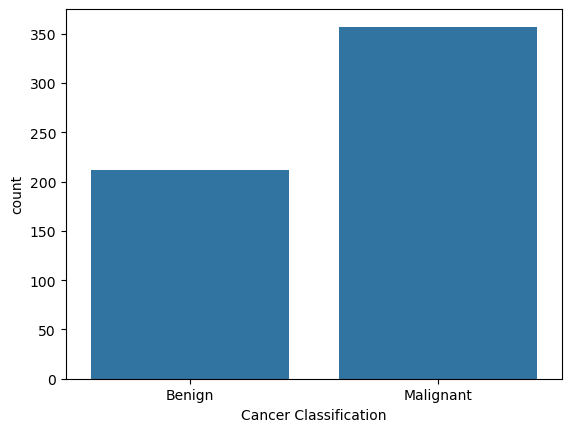

In [34]:
df_label = df["benign_0__mal_1"].map({0: "Benign", 1: "Malignant"}).values
ax = sns.countplot(x=df_label)
ax.set_xlabel("Cancer Classification")

<Axes: >

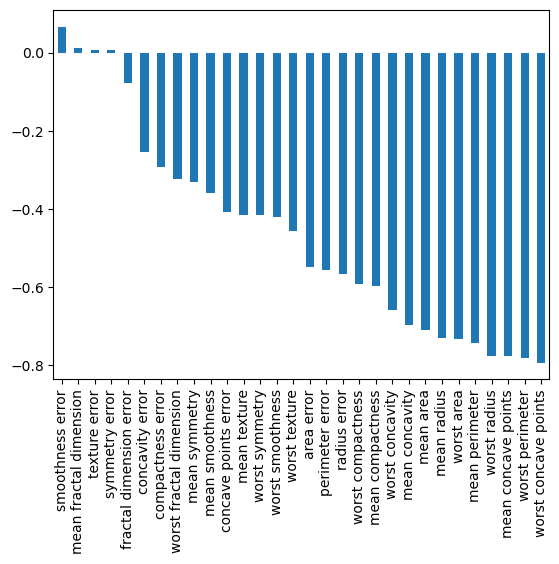

In [40]:
df.corr()["benign_0__mal_1"][:-1].sort_values(ascending=False).plot(kind="bar")

<Axes: >

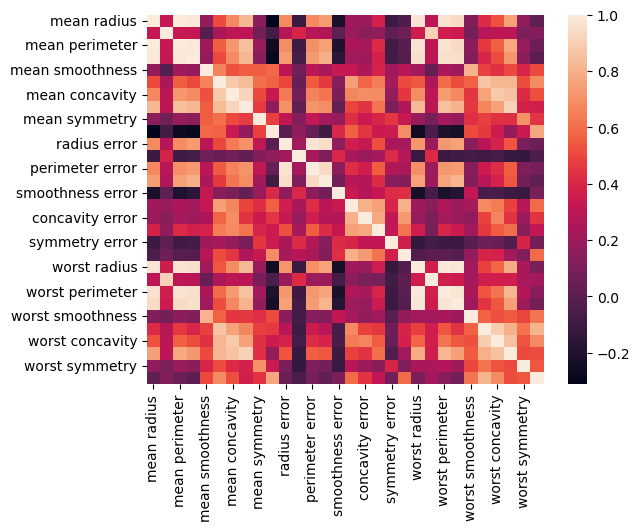

In [44]:
sns.heatmap(df.drop("benign_0__mal_1",axis=1).corr())

In [45]:
X = df.drop("benign_0__mal_1",axis=1)
y = df["benign_0__mal_1"]

In [46]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
X_train = scaler.fit_transform(X_train)

In [134]:
X_test = scaler.transform(X_test)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [55]:
X_train.shape

(426, 30)

In [95]:
model = Sequential()

model.add(Input(shape=(30,)))

model.add(Dense(30,activation="relu"))
model.add(Dense(15,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [96]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7081 - val_loss: 0.6827
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6833 - val_loss: 0.6643
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6648 - val_loss: 0.6459
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6439 - val_loss: 0.6211
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6177 - val_loss: 0.5910
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5796 - val_loss: 0.5566
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5509 - val_loss: 0.5164
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5111 - val_loss: 0.4762
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4808 - val_loss: 0.4347
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4467 - val_loss: 0.3937
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3969 - val_loss: 0.3566
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3

In [97]:
losses = pd.DataFrame(model.history.history)

<Axes: >

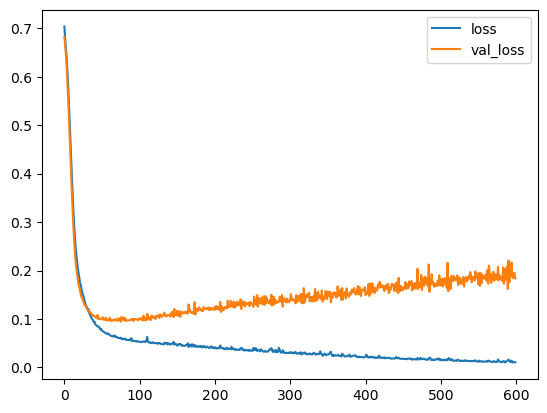

In [98]:
losses.plot()

In [106]:
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [136]:
model = Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [137]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7188 - val_loss: 0.6883
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7013 - val_loss: 0.6626
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6631 - val_loss: 0.6303
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6396 - val_loss: 0.5970
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6139 - val_loss: 0.5691
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5924 - val_loss: 0.5446
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5703 - val_loss: 0.5178
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5599 - val_loss: 0.4942
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5226 - val_loss: 0.4698
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5235 - val_loss: 0.4499
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5000 - val_loss: 0.4245
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

In [138]:
losses = pd.DataFrame(model.history.history)

<Axes: >

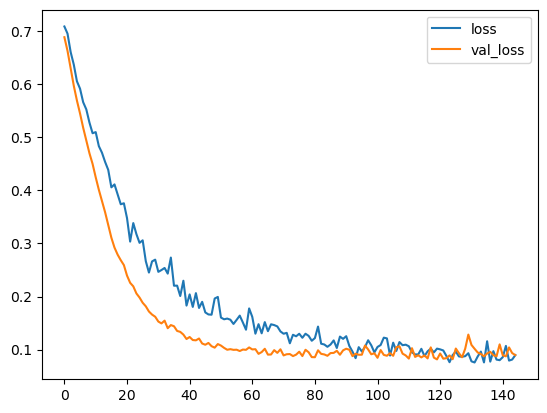

In [139]:
losses.plot()

In [111]:
X_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [151]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [152]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [140]:
from sklearn.metrics import classification_report,confusion_matrix

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [155]:
print(confusion_matrix(y_test,y_pred))

[[54  1]
 [ 2 86]]
